In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
video = pd.read_csv("data.csv")

# 展示数据的总体情况
video.info()  # 查看数据的结构和数据类型


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序号      6400 non-null   int64  
 1   作者编号    6400 non-null   int64  
 2   点赞数     6400 non-null   int64  
 3   评论数     6400 non-null   int64  
 4   分享数     6400 non-null   int64  
 5   BGM     6399 non-null   object 
 6   时长      6400 non-null   float64
 7   发布日期    6400 non-null   object 
 8   发布时间    6400 non-null   object 
 9   类别      6400 non-null   object 
 10  标题字数    6400 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 550.1+ KB


In [3]:
descriptive_stats = video.describe()
# 格式化为整数
descriptive_stats = descriptive_stats.applymap(lambda x: int(round(x)))
# 导出为 LaTeX 表格
latex_table = descriptive_stats.to_latex(
    index=True,  # 包含索引作为第一列
    caption="描述性统计结果",  # 表格标题
    label="tab:descriptive_stats"  # 表格标签，用于引用
)

# 打印 LaTeX 表格
print(latex_table)

\begin{table}
\centering
\caption{描述性统计结果}
\label{tab:descriptive_stats}
\begin{tabular}{lrrrrrrr}
\toprule
{} &    序号 &  作者编号 &      点赞数 &     评论数 &     分享数 &    时长 &  标题字数 \\
\midrule
count &  6400 &  6400 &     6400 &    6400 &    6400 &  6400 &  6400 \\
mean  &  3200 &  1281 &   651383 &   11702 &   21955 &    30 &    27 \\
std   &  1848 &   807 &   514325 &   13349 &   34354 &    18 &    14 \\
min   &     1 &     1 &    15165 &      28 &       3 &     4 &     0 \\
25\%   &  1601 &   532 &   309374 &    3216 &    2586 &    14 &    16 \\
50\%   &  3200 &  1332 &   538962 &    7256 &    7796 &    25 &    26 \\
75\%   &  4800 &  1992 &   844416 &   14887 &   24420 &    46 &    37 \\
max   &  6400 &  2612 &  4556768 &  120245 &  347589 &    60 &    72 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\19514\AppData\Local\Temp\ipykernel_8184\3192920180.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = descriptive_stats.to_latex(


In [4]:
video.head() # 查看前几行数据

,序号,作者编号,点赞数,评论数,分享数,BGM,时长,发布日期,发布时间,类别,标题字数
0,1,1,4093719,1035,160448,作者创作的原声,15.00,2019/5/6,17:47:07,美食,44
1,2,2,3263395,59098,214594,作者创作的原声,58.33,2019/1/4,17:17:59,美食,11
2,3,2,2962712,52549,109605,作者创作的原声,57.60,2019/2/11,17:33:23,美食,12
3,4,2,2953051,55461,215838,作者创作的原声,50.80,2019/1/26,17:44:18,美食,12
4,5,2,2821680,52263,125418,作者创作的原声,51.57,2019/1/29,17:06:04,美食,13


In [5]:
# 统计背景音乐的类别数量及占比
bgm_counts = video['BGM'].value_counts().head(6)
bgm_percentage = (bgm_counts / len(video) * 100).round(2).astype(str) + '%'

# 统计视频类型的类别数量及占比
category_counts = video['类别'].value_counts().head(6)
category_percentage = (category_counts / len(video) * 100).round(2).astype(str) + '%'

# 统计发布时间的类别数量及占比
video['发布时间'] = pd.to_datetime(video['发布时间'])
hour_counts = video['发布时间'].dt.hour.value_counts().head(6)
hour_percentage = (hour_counts / len(video) * 100).round(2).astype(str) + '%'

# 统计发布日期的类别数量及占比
video['发布日期'] = pd.to_datetime(video['发布日期'])
date_counts = video['发布日期'].dt.date.value_counts().head(6)
date_percentage = (date_counts / len(video) * 100).round(2).astype(str) + '%'

# 合并背景音乐的数量和占比
bgm_df = pd.DataFrame({'BGM': bgm_counts.index, 'Count': bgm_counts.values, 'Percentage': bgm_percentage.values})

# 合并视频类型的数量和占比
category_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values, 'Percentage': category_percentage.values})

# 合并发布时间的数量和占比
hour_df = pd.DataFrame({'Hour': hour_counts.index, 'Count': hour_counts.values, 'Percentage': hour_percentage.values})

# 合并发布日期的数量和占比
date_df = pd.DataFrame({'Date': date_counts.index, 'Count': date_counts.values, 'Percentage': date_percentage.values})

# 横置 DataFrame
bgm_df = bgm_df.set_index('BGM').transpose()
category_df = category_df.set_index('Category').transpose()
hour_df = hour_df.set_index('Hour').transpose()
date_df = date_df.set_index('Date').transpose()

# 将背景音乐的统计结果转换为 LaTeX 表格
bgm_latex = bgm_df.to_latex(caption="背景音乐类别数量及占比（前十个）", label="tab:bgm_counts")

# 将视频类型的统计结果转换为 LaTeX 表格
category_latex = category_df.to_latex(caption="视频类型类别数量及占比（前十个）", label="tab:category_counts")

# 将发布时间的统计结果转换为 LaTeX 表格
hour_latex = hour_df.to_latex(caption="发布时间（小时）类别数量及占比（前十个）", label="tab:hour_counts")

# 将发布日期的统计结果转换为 LaTeX 表格
date_latex = date_df.to_latex(caption="发布日期类别数量及占比（前十个）", label="tab:date_counts")

C:\Users\19514\AppData\Local\Temp\ipykernel_8184\1144549476.py:38: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  bgm_latex = bgm_df.to_latex(caption="背景音乐类别数量及占比（前十个）", label="tab:bgm_counts")
C:\Users\19514\AppData\Local\Temp\ipykernel_8184\1144549476.py:41: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  category_latex = category_df.to_latex(caption="视频类型类别数量及占比（前十个）", label="tab:category_counts")
C:\Users\19514\AppData\Local\Temp\ipykernel_8184\1144549476.py:44: FutureWarn

In [6]:
# print(bgm_latex)
# print(category_latex)
# print(hour_latex)
print(date_latex)

\begin{table}
\centering
\caption{发布日期类别数量及占比（前十个）}
\label{tab:date_counts}
\begin{tabular}{lllllll}
\toprule
Date & 2019-01-26 & 2019-02-17 & 2019-02-18 & 2019-01-25 & 2019-02-15 & 2019-02-09 \\
\midrule
Count      &         76 &         75 &         74 &         72 &         70 &         69 \\
Percentage &      1.19\% &      1.17\% &      1.16\% &      1.12\% &      1.09\% &      1.08\% \\
\bottomrule
\end{tabular}
\end{table}



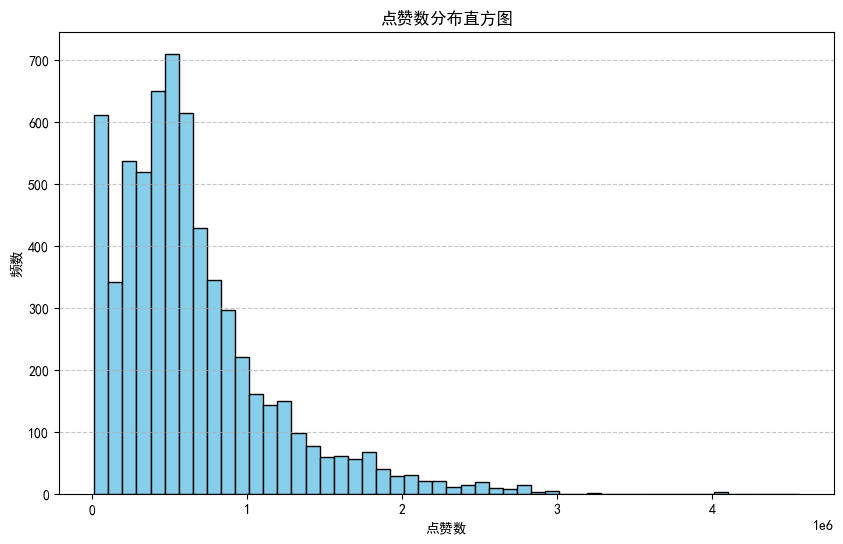

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 读取数据
video = pd.read_csv("data.csv")

# 绘制点赞数的直方图
plt.figure(figsize=(10, 6))
plt.hist(video['点赞数'], bins=50, color='skyblue', edgecolor='black')
plt.title('点赞数分布直方图')
plt.xlabel('点赞数')
plt.ylabel('频数')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

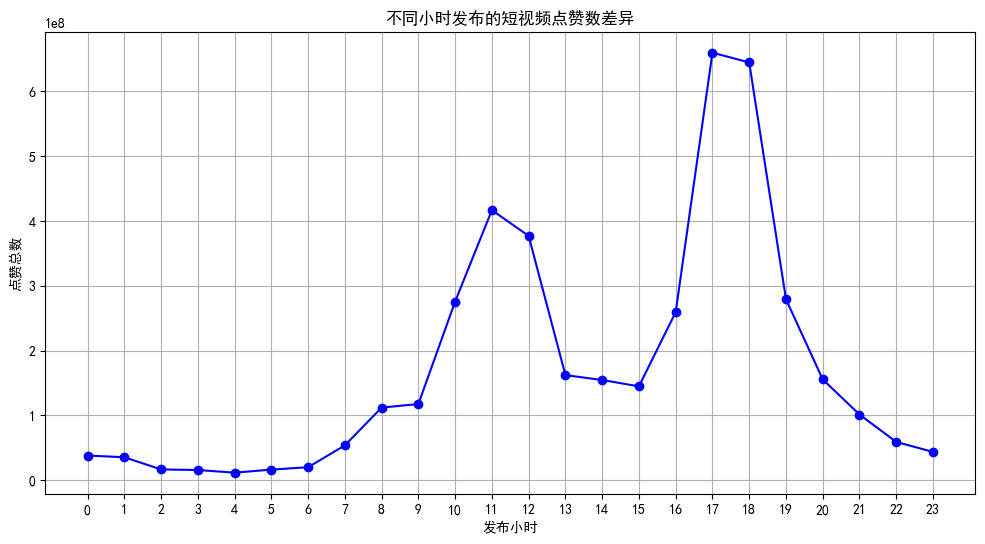

In [8]:
# 转换发布时间为小时
video['发布时间'] = pd.to_datetime(video['发布时间'])
video['发布小时'] = video['发布时间'].dt.hour

# 按小时分组并计算每小时的点赞数总和
hourly_stats = video.groupby('发布小时')['点赞数'].sum().reset_index()

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(hourly_stats.index, [value[1] for value in hourly_stats.values], marker='o', linestyle='-', color='b')
plt.title('不同小时发布的短视频点赞数差异')
plt.xlabel('发布小时')
plt.ylabel('点赞总数')
plt.xticks(range(24))  # 确保每个小时都有标记
plt.grid(True)
plt.show()

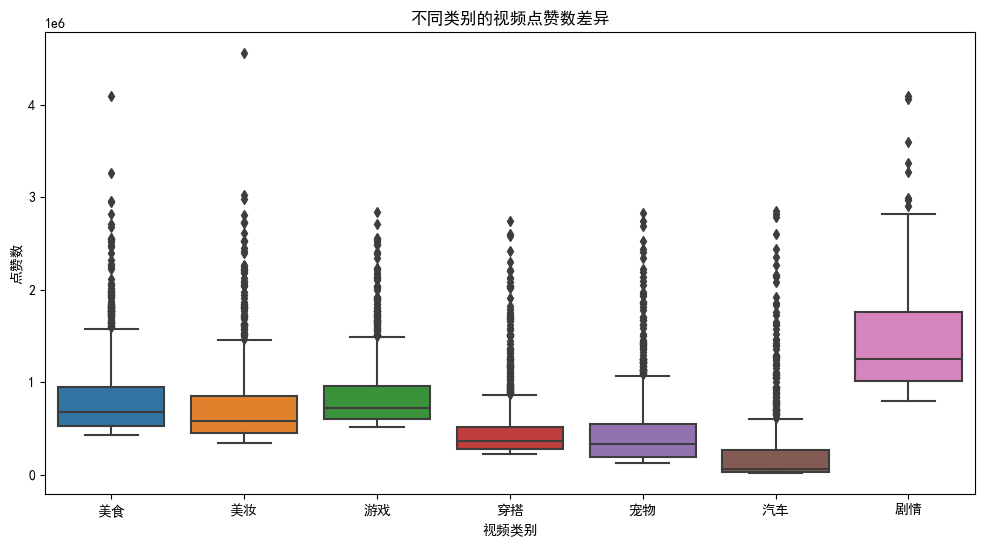

In [9]:
# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 绘制分组箱线图
plt.figure(figsize=(12, 6))

# 假设类别列名为'类别'，点赞数列名为'点赞数'
sns.boxplot(x='类别', y='点赞数', data=video)

# 添加标题和标签
plt.title('不同类别的视频点赞数差异')
plt.xlabel('视频类别')
plt.ylabel('点赞数')

# 显示图形
plt.show()

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd
import numpy as np

# 假设 video 是包含 '发布时间' 列的 DataFrame
# 如果 '发布时间' 列不是 datetime64 类型，先转换为 datetime64
video['发布时间'] = pd.to_datetime(video['发布时间'])

# 提取时间部分
video['时间'] = video['发布时间'].dt.time
video = video[video['类别'] != '汽车']

# 定义时段划分函数
def get_time_period(time):
    if time >= pd.to_datetime('20:00').time() or time < pd.to_datetime('06:00').time():
        return '夜间'
    elif time >= pd.to_datetime('06:00').time() and time < pd.to_datetime('09:00').time():
        return '早间'
    elif time >= pd.to_datetime('09:00').time() and time < pd.to_datetime('12:00').time():
        return '上午'
    elif time >= pd.to_datetime('12:00').time() and time < pd.to_datetime('14:00').time():
        return '中午'
    elif time >= pd.to_datetime('14:00').time() and time < pd.to_datetime('17:00').time():
        return '下午'
    elif time >= pd.to_datetime('17:00').time() and time < pd.to_datetime('20:00').time():
        return '傍晚'

# 应用时段划分函数
video['视频发布时段'] = video['时间'].apply(get_time_period)

# 删除临时列 '时间'（如果需要）
video.drop(columns=['时间'], inplace=True)

# 查看结果
# print(video.head())


# 对数化点赞数
video['对数点赞数'] = np.log(video['点赞数'] + 1)  # 加1避免log(0)问题
video['对数分享数'] = np.log(video['分享数'] + 1)
video['对数评论数'] = np.log(video['评论数'] + 1)

# 定义自变量和因变量
y = video['对数点赞数']
X = video.loc[:, ['视频发布时段', '对数分享数', '对数评论数', '时长', '类别', '标题字数']]


# 手动处理类别变量的哑变量
# 处理视频发布时段列，将夜间作为参考类别
time_period_dummies = pd.get_dummies(X['视频发布时段'], prefix='视频发布时段')
time_period_dummies = time_period_dummies.drop(columns=['视频发布时段_夜间'])

# 处理类别列，将宠物作为参考类别
category_dummies = pd.get_dummies(X['类别'], prefix='类别')
category_dummies = category_dummies.drop(columns=['类别_宠物'])

# 合并哑变量和数值列
numerical_columns = X.select_dtypes(include=[np.number])
X = pd.concat([numerical_columns, time_period_dummies, category_dummies], axis=1)


In [11]:
X.head(10)

,对数分享数,对数评论数,时长,标题字数,视频发布时段_上午,视频发布时段_下午,视频发布时段_中午,视频发布时段_傍晚,视频发布时段_早间,类别_剧情,类别_游戏,类别_穿搭,类别_美妆,类别_美食
0,11.985731,6.943122,15.00,44,0,0,0,1,0,0,0,0,0,1
1,12.276508,10.986969,58.33,11,0,0,0,1,0,0,0,0,0,1
2,11.604647,10.869520,57.60,12,0,0,0,1,0,0,0,0,0,1
3,12.282288,10.923453,50.80,12,0,0,0,1,0,0,0,0,0,1
4,11.739415,10.864063,51.57,13,0,0,0,1,0,0,0,0,0,1
5,12.752736,10.788803,31.73,21,0,1,0,0,0,0,0,0,0,1
6,11.986940,10.542416,38.00,11,0,0,0,1,0,0,0,0,0,1
7,12.375908,10.740215,36.50,11,0,1,0,0,0,0,0,0,0,1
8,10.913942,10.322165,13.80,8,0,0,0,0,1,0,0,0,0,1
9,11.876054,10.656224,51.87,12,0,0,0,1,0,0,0,0,0,1


In [12]:
# 添加常数项
X = sm.add_constant(X)

# 建立模型
model = sm.OLS(y, X).fit()

# 输出模型摘要
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  对数点赞数   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     621.7
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:27:07   Log-Likelihood:                -2570.5
No. Observations:                5400   AIC:                             5171.
Df Residuals:                    5385   BIC:                             5270.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8730      0.055    177.949      0.000       9.764       9.982
对数分享数          0.0995      0.004     23.372      0.000       0.091       0.108
对数评论数          0.2302      0.006     37.141      0.000       0.218       0.242
时长             0.0028      0.000      8.226      0.000       0.002       0.003
标题字数           0.0013      0.000      3.300      0.001       0.001       0.002
视频发布时段_上午      0.0165      0.019      0.858      0.391      -0.021       0.054
视频发布时段_下午      0.0170      0.021      0.814      0.416      -0.024       0.058
视频发布时段_中午      0.0323      0.021      1.548      0.122      -0.009       0.073
视频发布时段_傍晚      0.0445      0.017      2.573      0.010       0.011       0.078
视频发布时段_早间      0.0054      0.028      0.192      0.848      -0.050       0.060
类别_剧情          0.8239      0.026     32.222      0.000       0.774       0.874
类别_游戏          0.5393      0.018     29.717      0.000       0.504       0.575
类别_穿搭          0.0291      0.018      1.627      0.104      -0.006       0.064
类别_美妆          0.3424      0.018     18.733      0.000       0.307       0.378
类别_美食          0.4238      0.019     22.869      0.000       0.387       0.460
==============================================================================
Omnibus:                       98.116   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.705
Skew:                           0.306   Prob(JB):                     6.75e-24
Kurtosis:                       3.317   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
latex_summary = model.summary2().as_latex()
print(latex_summary)

\begin{table}
\caption{Results: Ordinary least squares}
\label{}
\begin{center}
\begin{tabular}{llll}
\hline
Model:              & OLS              & Adj. R-squared:     & 0.617      \\
Dependent Variable: & 对数点赞数            & AIC:                & 5170.9275  \\
Date:               & 2025-03-14 16:27 & BIC:                & 5269.8398  \\
No. Observations:   & 5400             & Log-Likelihood:     & -2570.5    \\
Df Model:           & 14               & F-statistic:        & 621.7      \\
Df Residuals:       & 5385             & Prob (F-statistic): & 0.00       \\
R-squared:          & 0.618            & Scale:              & 0.15212    \\
\hline
\end{tabular}
\end{center}

\begin{center}
\begin{tabular}{lrrrrrr}
\hline
           &  Coef. & Std.Err. &        t & P$> |$t$|$ &  [0.025 & 0.975]  \\
\hline
const      & 9.8730 &   0.0555 & 177.9490 &      0.0000 &  9.7642 & 9.9818  \\
对数分享数      & 0.0995 &   0.0043 &  23.3719 &      0.0000 &  0.0912 & 0.1079  \\
对数评论数      & 0.2302 &   0.0

In [14]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import matplotlib.pyplot as plt

In [15]:
# 1. 异方差检验
# 使用 Breusch-Pagan 检验
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan 检验结果:")
print(f"统计量: {bp_test[0]}, p 值: {bp_test[1]}")
if bp_test[1] < 0.05:
    print("存在异方差问题。")
else:
    print("不存在异方差问题。")

Breusch-Pagan 检验结果:
统计量: 645.7923578481278, p 值: 9.40018335410313e-129
存在异方差问题。


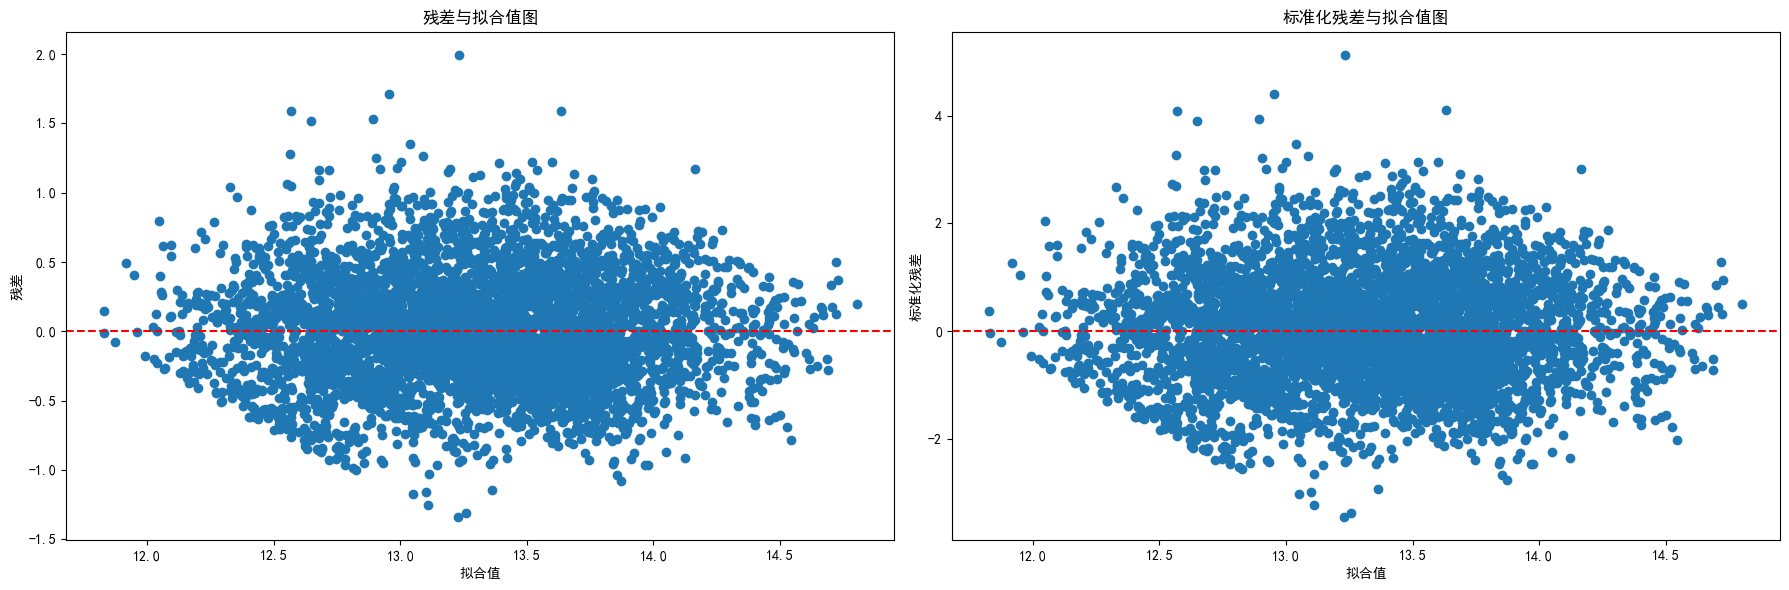

In [22]:
# 绘制残差与拟合值图
plt.figure(figsize=(18, 6))

# 残差与拟合值图
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('拟合值')
plt.ylabel('残差')
plt.title('残差与拟合值图')

# 标准化残差与拟合值图
plt.subplot(1, 2, 2)
standardized_residuals = model.get_influence().resid_studentized_internal
plt.scatter(model.fittedvalues, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('拟合值')
plt.ylabel('标准化残差')
plt.title('标准化残差与拟合值图')

plt.tight_layout()
plt.show()

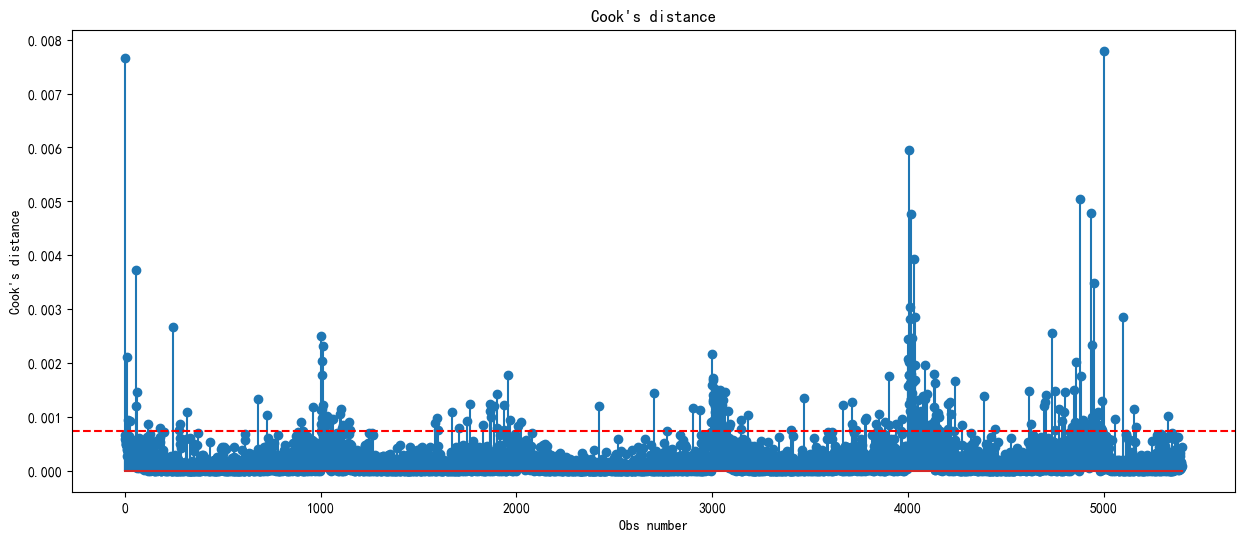

In [25]:
# 2. 强影响点检测
# 得到影响统计量
plt.figure(figsize=(15, 6))
influence = model.get_influence()
# 计算 Cook's 距离
cooks_d = influence.cooks_distance
# 可视化 Cook's 距离
plt.stem(np.arange(len(cooks_d[0])), cooks_d[0])
plt.axhline(y=4/len(cooks_d[0]), color='r', linestyle='--')
plt.title("Cook's distance")
plt.xlabel("Obs number")
plt.ylabel("Cook's distance")
plt.show()

In [26]:
# 3. 多重共线性诊断
# 计算方差膨胀因子（VIF）
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print("方差膨胀因子 (VIF):")
print(vif)
# 一般认为 VIF > 10 时存在严重的多重共线性
if any(vif["VIF Factor"][1:] > 10):
    print("存在多重共线性问题。")
else:
    print("不存在多重共线性问题。")

latex_table = vif.to_latex(na_rep='nan')
print("LaTeX 表格代码:")
print(latex_table)

方差膨胀因子 (VIF):
    VIF Factor   features
0   109.272119      const
1     1.355862      对数分享数
2     1.433491      对数评论数
3     1.244912         时长
4     1.047378       标题字数
5     2.020921  视频发布时段_上午
6     1.746456  视频发布时段_下午
7     1.756605  视频发布时段_中午
8     2.467114  视频发布时段_傍晚
9     1.319036  视频发布时段_早间
10    1.591950      类别_剧情
11    1.764051      类别_游戏
12    1.708771      类别_穿搭
13    1.789303      类别_美妆
14    1.839619      类别_美食
不存在多重共线性问题。
LaTeX 表格代码:
\begin{tabular}{lrl}
\toprule
{} &  VIF Factor &   features \\
\midrule
0  &  109.272119 &      const \\
1  &    1.355862 &      对数分享数 \\
2  &    1.433491 &      对数评论数 \\
3  &    1.244912 &         时长 \\
4  &    1.047378 &       标题字数 \\
5  &    2.020921 &  视频发布时段\_上午 \\
6  &    1.746456 &  视频发布时段\_下午 \\
7  &    1.756605 &  视频发布时段\_中午 \\
8  &    2.467114 &  视频发布时段\_傍晚 \\
9  &    1.319036 &  视频发布时段\_早间 \\
10 &    1.591950 &      类别\_剧情 \\
11 &    1.764051 &      类别\_游戏 \\
12 &    1.708771 &      类别\_穿搭 \\
13 &    1.789303 &      类别\_美妆 \\
14 

C:\Users\19514\AppData\Local\Temp\ipykernel_8184\3460960694.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = vif.to_latex(na_rep='nan')


In [19]:
# 4. 正态性检验
# 使用 Jarque-Bera 检验
jb_test = stats.jarque_bera(model.resid)
print("Jarque-Bera 检验结果:")
print(f"统计量: {jb_test[0]}, p 值: {jb_test[1]}")
if jb_test[1] < 0.05:
    print("残差不服从正态分布。")
else:
    print("残差服从正态分布。")

Jarque-Bera 检验结果:
统计量: 106.70495360977861, p 值: 6.750154725835953e-24
残差不服从正态分布。


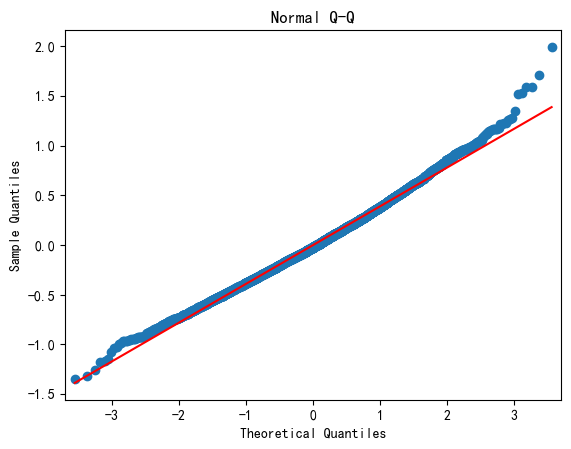

In [29]:
# 绘制残差的 QQ 图
fig = sm.qqplot(model.resid, line='s')
plt.title('Normal Q-Q')
plt.show()